## Решение уравнения теплопроводности метеодом прогонки

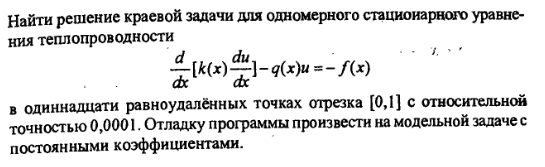

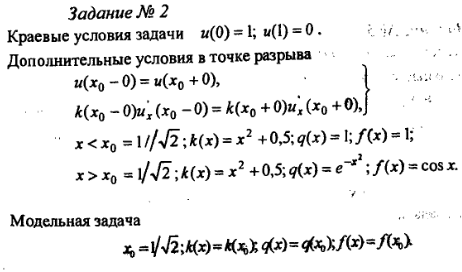

Для начала, необходимо реализовать решение СЛАУ методом прогонки. Он полезен и решает систему быстро, если она имеет трёхдиагональный вид (показан на картинке ниже). Часто уравнения переноса (и прочие разностные схемы) содержат в себе не более 3-х разностных членов, поэтому подобные трёхдиагональные схемы встречаются часто

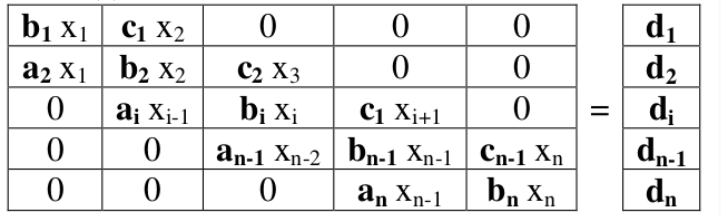

In [163]:
from matplotlib import pyplot as plt
def makeplot(x, y, xlabel = "x", ylabel = "y", title = "y(x)", show = 1, grid = 1, label = 0):
    if label != 0:
        plt.plot(x, y, label = label, color = np.random.rand(3))
        plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
    else:
        plt.plot(x, y, color = np.random.rand(3))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if grid:
        plt.grid()
    if show:
        plt.show()

In [267]:
import numpy as np
def TMA(a, b, c, d):
    n = len(b)
    a = 2*[0] + a
    b = [0] + b
    c = [0] + c + [0]
    d = [0] + d
    y = np.zeros(n+1)
    alpha = np.zeros(n+1)
    beta = np.zeros(n+1)
    for i in range(1,n+1):
        y[i] = b[i] + a[i]*alpha[i-1]
        alpha[i] = -c[i]/y[i]
        beta[i] = (d[i] - a[i] * beta[i-1])/y[i]
    x = np.zeros(n+1)
    x[n] = beta[n]
    for i in range(n-1, 0, -1):
        x[i] = alpha[i] * x[i+1] + beta[i]
    return x[1:]
# x0 = 0.525
# def k(x0, x):
#     return (x**2 + 1.0) if x < x0 else x
# def q(x0, x):
#     return np.exp(-x)
# def f(x0, x):
#     return 1 if x < x0 else x**3

Для проверки работы алгоритма прогонки, решим следующую простую систему:

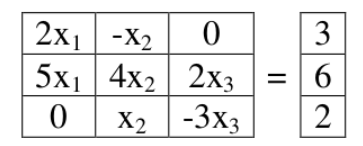

In [266]:
print(TMA([5, 1], [2,4,-3], [-1,2], [3,6,2]))

[ 1.48837209 -0.02325581 -0.6744186 ]


Решение, как можно убедиться, правильное

Используем следующее приближение для производной в уравнении теплопроводности, благодаря чему и приведём систему к трёхдиагональному виду:

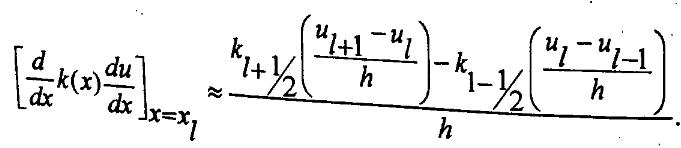

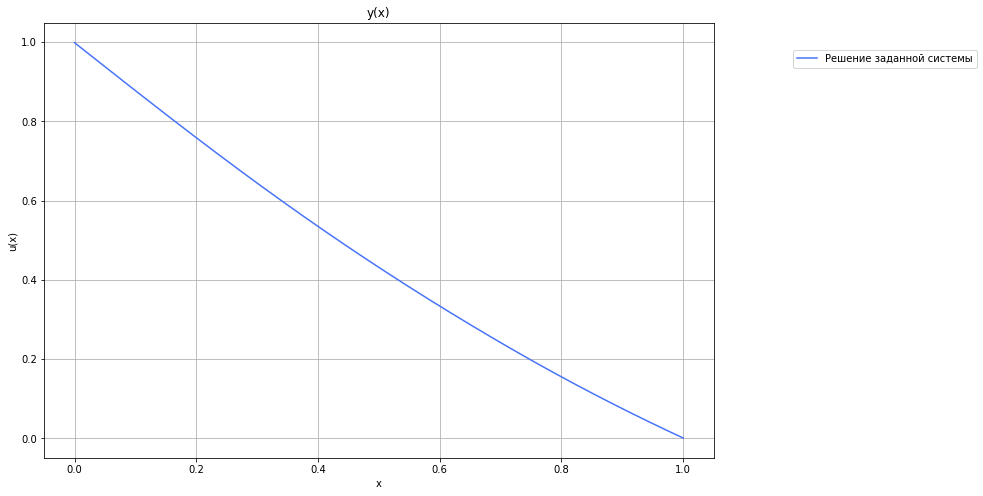

In [275]:
#посчитаем диагонали для уравнения заданного типа
def calc_eq_diagonals(k, q, f, x0, x=[0,1], points=11, u0 = [1,0]):
    x = np.linspace(x[0], x[1], points)
    u = np.zeros(points)
    u[0] = u0[0]
    u[-1] = u0[1]

    a = [0] * (points-1)
    b = [0] * points
    c = [0] * (points-1)
    d = [0] * points

    h = x[1]-x[0]
    for i in range(points-1):
        c[i] = k(x0, x[i]+h/2)/h**2
        b[i] = -k(x0, x[i]+h/2)/h**2 - k(x0, x[i]-h/2)/h**2 - q(x0, x[i])
        d[i] = -f(x0, x[i])
        a[i] = k(x0, x[i+1]-h/2)/h**2 

    b[-1] = -k(x0, x[-1] + h/2)/h**2 - k(x0, x[-1]-h/2)/h**2 - q(x0, x[-1])
    d[0] = -f(x0, x[0]) - k(x0, x[0] - h/2)/h**2 * u[0]
    d[-1] = -f(x0, x[-1]) - k(x0, x[-1] + h/2)/h**2 * u[-1]
    return a, b, c, d, x

def k(x0, x):
    return x**2 + 0.5

def q(x0, x):
    return 1 if x < x0 else np.exp(-x**2)

def f(x0, x):
    return 1 if x < x0 else np.cos(x)
x0 = 1/np.sqrt(2)

a, b, c, d, x = calc_eq_diagonals(k, q, f, x0, points = 1000, u0 = [1, 0])
u = TMA(a, b, c, d)
plt.figure(figsize = (12, 8))
makeplot(x, u, ylabel = "u(x)", label = "Решение заданной системы")
plt.show()

Таким образом, получено решение уравнения теплопроводности методом прогонки